In [134]:
import numpy as np
import pandas as pd

In [135]:
df_sms = pd.read_csv(filepath_or_buffer=".\\dataset\\spam.csv", encoding="ISO-8859-1")

In [136]:
df_sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [137]:
df_sms.shape

(5572, 5)

In [138]:
df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [139]:
df_sms.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [140]:
df_sms.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [141]:
df_sms.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [142]:
df_sms.sample(5)

,v1,v2
1657,ham,S:-)if we have one good partnership going we w...
2723,ham,"Tunde, how are you doing. This is just wishing..."
1901,ham,"Sorry, I'll call later"
2867,ham,"Aight, tomorrow around &lt;#&gt; it is"
553,ham,Ok. Every night take a warm bath drink a cup o...


In [143]:
df_sms['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [144]:
df_sms = df_sms.rename(columns={"v1":"type", "v2":"sms"})

In [145]:
df_sms.sample()

,type,sms
4795,spam,URGENT This is our 2nd attempt to contact U. Y...


In [146]:
df_sms.duplicated().sum()

403

In [147]:
df_sms.drop_duplicates(inplace=True)

In [148]:
df_sms.duplicated().sum()

0

In [149]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [150]:
spam_or_not = df_sms['type'].value_counts()
spam_or_not

type
ham     4516
spam     653
Name: count, dtype: int64

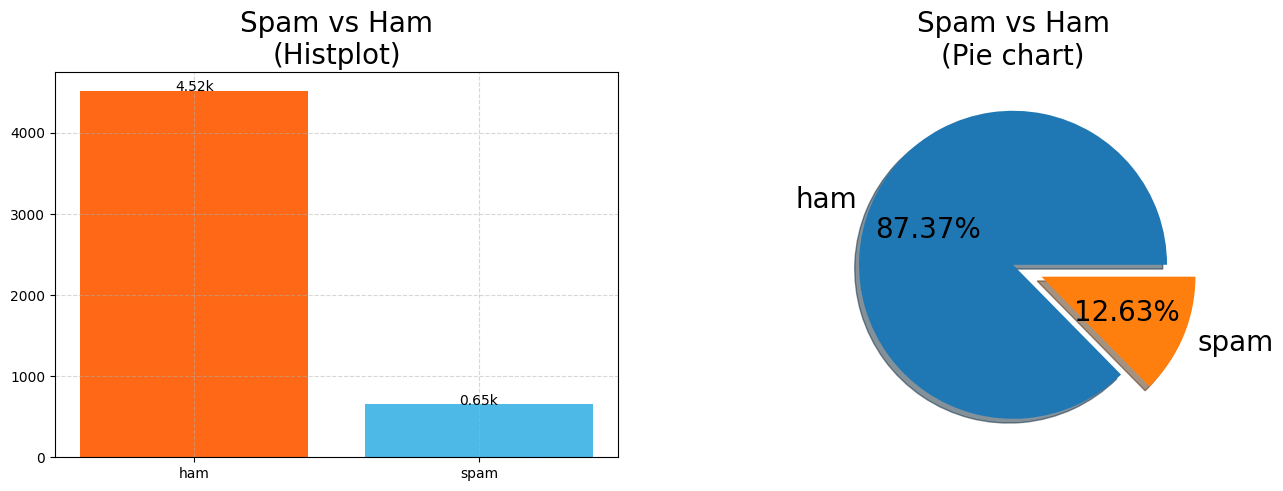

In [151]:
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
plt.bar(spam_or_not.index, spam_or_not.values, color = ["#FE6816","#4CB9E7"])
for i, value in enumerate(spam_or_not.values):
    plt.text(i, value, f"{round(value/1000, 2)}k", ha='center')
plt.grid( True, linestyle='--', alpha=0.5, zorder=0)
plt.title(label="Spam vs Ham\n(Histplot)", fontdict={"size" : "20"})

plt.subplot(1,2,2)
plt.pie(x=spam_or_not,explode=[0,0.2], shadow=True, labels=spam_or_not.index,textprops={'fontsize':20},autopct = "%.2f%%")
plt.title(label="Spam vs Ham\n(Pie chart)", fontdict={"size" : "20"})
plt.show()

In [152]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

In [153]:
# creating three more columns 
# 1. number of characters
# 2. number of words.
# 3. number of sentences.

In [154]:
df_sms['number_of_chars'] = df_sms['sms'].apply(lambda x: len(x))

In [155]:
df_sms['number_of_words'] = df_sms['sms'].apply(lambda x: len(nltk.word_tokenize(x)))

In [156]:
df_sms['number_of_sentences'] = df_sms['sms'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [157]:
df_sms.sample()

,type,sms,number_of_chars,number_of_words,number_of_sentences
3187,spam,This is the 2nd time we have tried 2 contact u...,153,34,4


In [158]:
spam_v_ham = df_sms.groupby(by='type')
ham = spam_v_ham.get_group(name='ham')
spam = spam_v_ham.get_group(name='spam')

In [159]:
ham.describe()

,number_of_chars,number_of_words,number_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [160]:
spam.describe()

,number_of_chars,number_of_words,number_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [161]:
x = pd.concat([ ham.describe().loc['mean'], spam.describe().loc['mean']], axis=1)
x.columns = ['ham', 'spam']
x = x.T
x

,number_of_chars,number_of_words,number_of_sentences
ham,70.459256,17.123782,1.820195
spam,137.891271,27.667688,2.970904


In [162]:
y = pd.concat([ ham.describe().loc['min'], spam.describe().loc['min']], axis=1)
y.columns = ['ham', 'spam']
y.astype({'ham' : 'int64', 'spam': 'int64'}).T

,number_of_chars,number_of_words,number_of_sentences
ham,2,1,1
spam,13,2,1


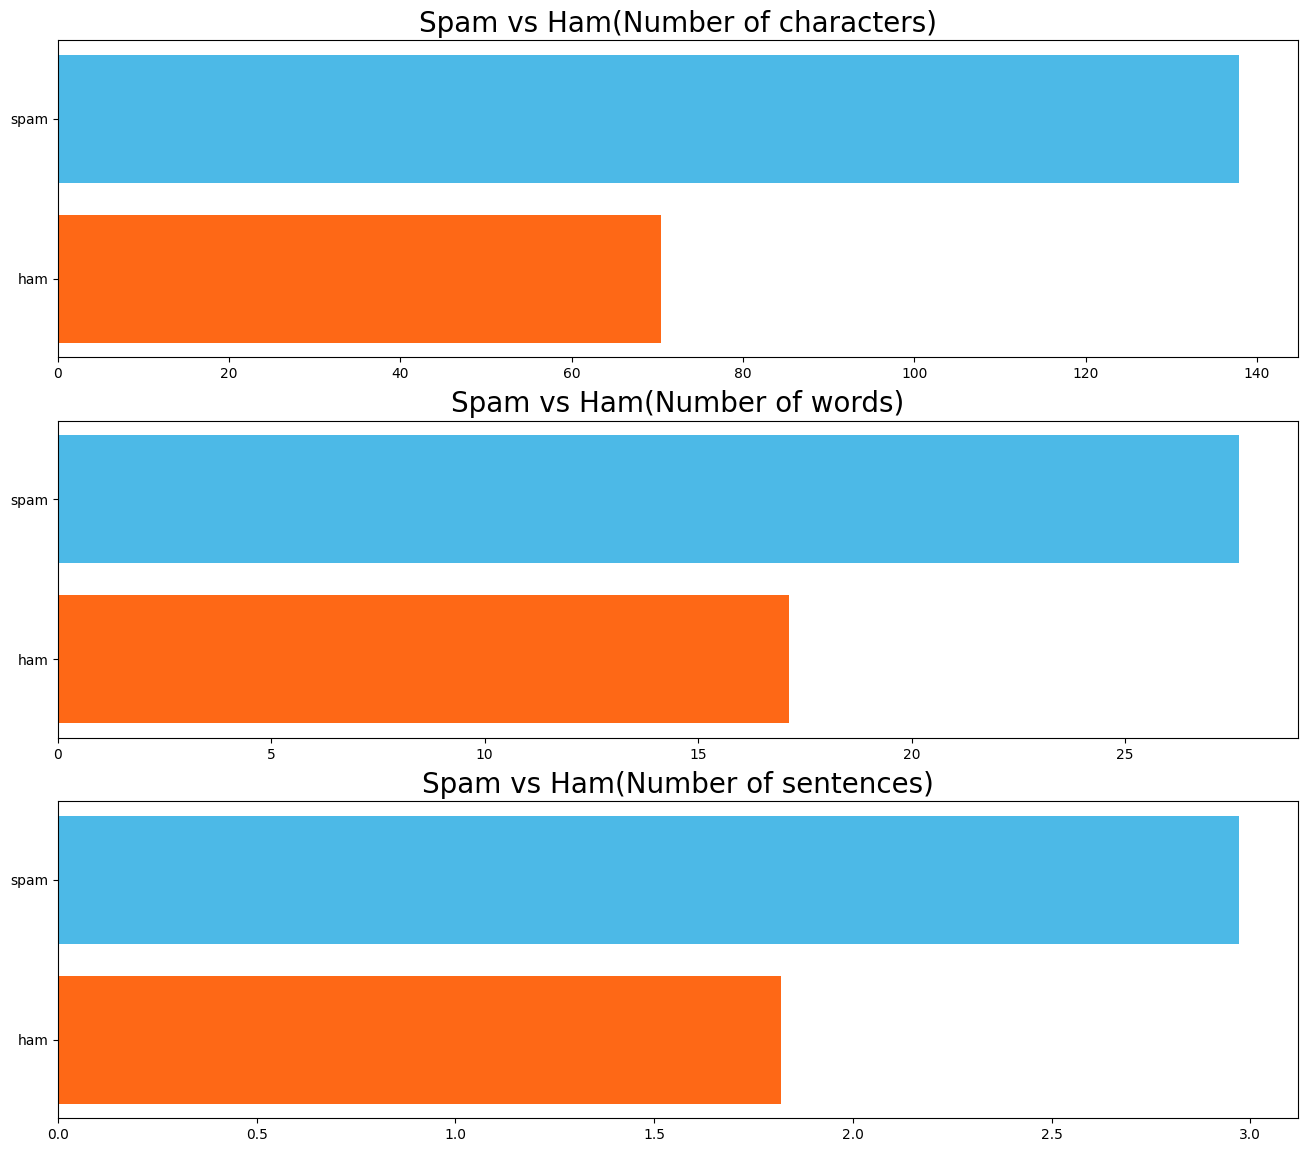

In [163]:
plt.figure(figsize=[16,14])
plt.subplot(3,1,1)
plt.barh(y=x.index, width=x['number_of_chars'], color = ["#FE6816","#4CB9E7"])
plt.title(label="Spam vs Ham(Number of characters)", fontdict={"size" : "20"})
plt.subplot(3,1,2)
plt.barh(y=x.index, width=x['number_of_words'], color = ["#FE6816","#4CB9E7"])
plt.title(label="Spam vs Ham(Number of words)", fontdict={"size" : "20"})
plt.subplot(3,1,3)
plt.barh(y=x.index, width=x['number_of_sentences'], color = ["#FE6816","#4CB9E7"])
plt.title(label="Spam vs Ham(Number of sentences)", fontdict={"size" : "20"})
plt.show()

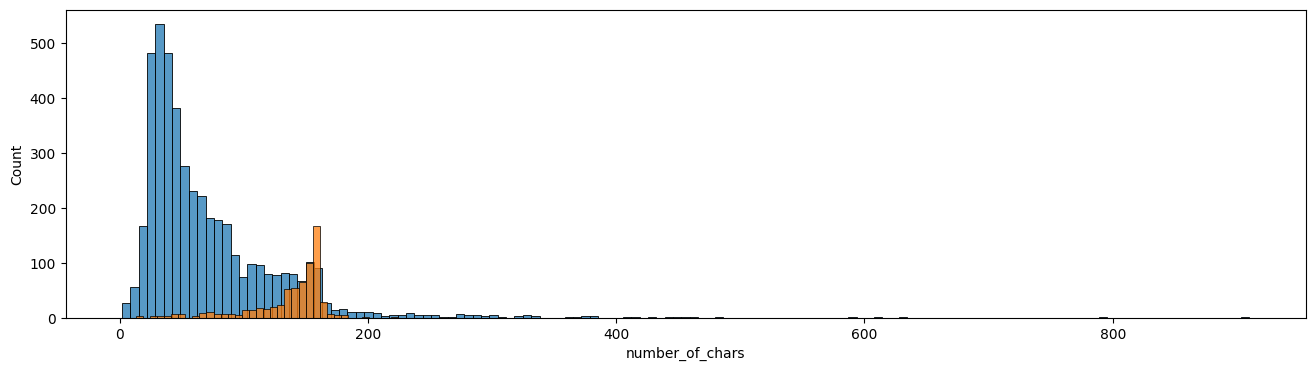

In [164]:
plt.figure(figsize=[16,4])
sns.histplot(df_sms[df_sms['type']=='ham']['number_of_chars'])
sns.histplot(df_sms[df_sms['type']=='spam']['number_of_chars'])
plt.show()

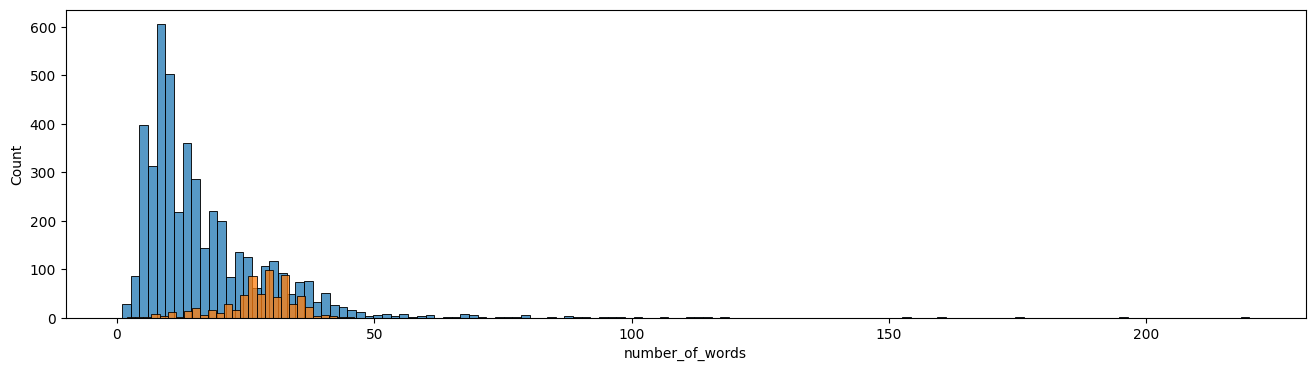

In [165]:
plt.figure(figsize=[16,4])
sns.histplot(df_sms[df_sms['type']=='ham']['number_of_words'])
sns.histplot(df_sms[df_sms['type']=='spam']['number_of_words'])
plt.show()

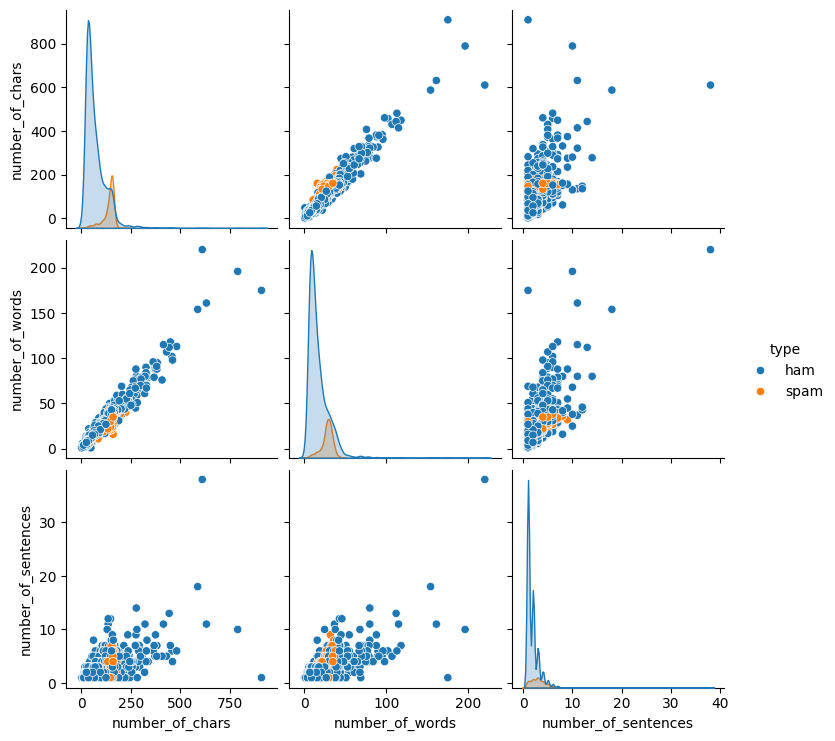

In [166]:
sns.pairplot(data=df_sms, hue='type')
plt.show()

In [167]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_sms['type'] = encoder.fit_transform(df_sms['type'])

In [168]:
continuous_data = df_sms.select_dtypes(include=['int']).columns
continuous_data

Index(['type', 'number_of_chars', 'number_of_words', 'number_of_sentences'], dtype='object')

In [169]:
df_sms

,type,sms,number_of_chars,number_of_words,number_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


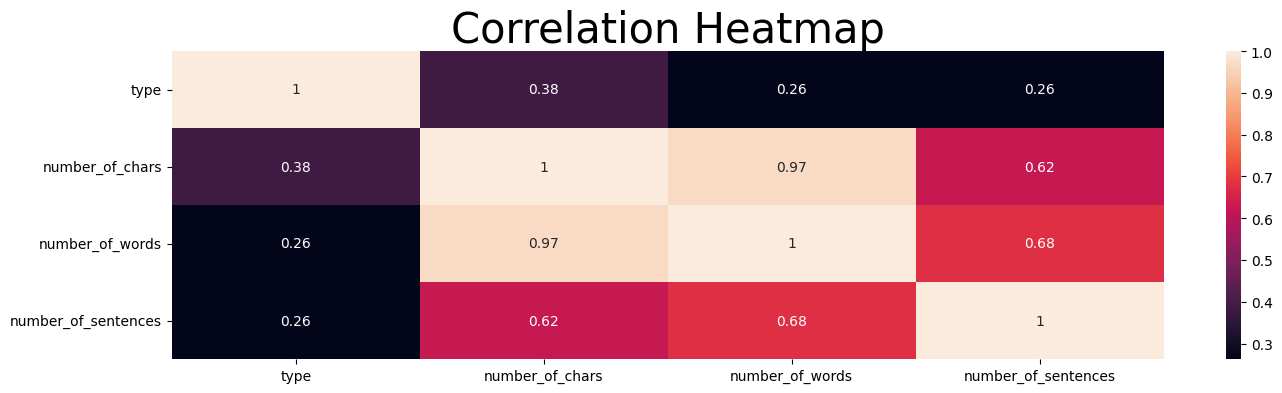

In [170]:
# correlation matrix
corr_matrix = df_sms[continuous_data].corr()

# Create a heatmap using seaborn
plt.figure(figsize=[16,4])
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap', fontdict={'fontsize' : 30})
plt.show()

In [171]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [172]:
def text_preprocess(text:str):
    lower_case = text.lower()
    lower_case_list = nltk.word_tokenize(lower_case)
    
    words = []
    for i in lower_case_list:
        if i.isalnum() and i not in stopwords.words('english')  :
            words.append(i)

    stemed_words = []
    for j in words:
        
        stemed_words.append(ps.stem(j))
        
    return " ".join(stemed_words)
    

In [173]:
# testing
text_preprocess('hello i act acted acting actor 20% better ~`!@#$%^&*()_+=-{[\\|;:<>,./?\"\']}')

'hello act act act actor 20 better'

In [174]:
df_sms['transformed_text'] = df_sms['sms'].apply(text_preprocess)

In [175]:
from wordcloud import WordCloud

In [176]:
wc = WordCloud(width= 600, height= 600, min_font_size=10, background_color='white')

In [177]:
ham_cloud = wc.generate(df_sms[df_sms['type'] == 0]['transformed_text'].str.cat(sep = " "))

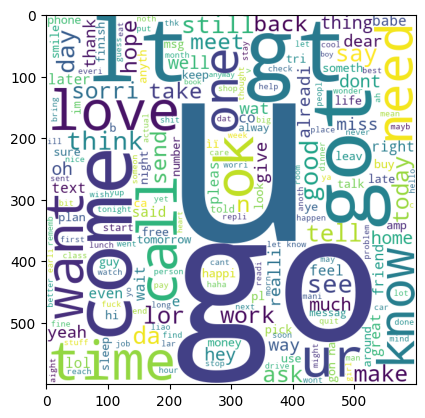

In [178]:
plt.imshow(ham_cloud)
plt.show()

In [179]:
spam_cloud = wc.generate(df_sms[df_sms['type'] == 1]['transformed_text'].str.cat(sep = " "))

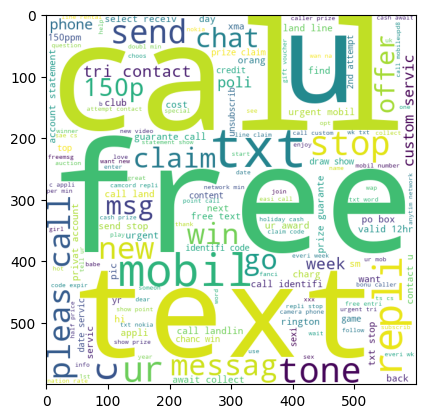

In [180]:
plt.imshow(spam_cloud)
plt.show()

In [181]:
from collections import Counter

In [182]:
def word_counter(x:int):
    corpus = []
    for sms in df_sms[df_sms['type'] == x]['transformed_text'].to_list():
        for word in sms.split():
            corpus.append(word)
    return corpus

In [183]:
# ham words
ham_words = Counter(word_counter(0))
ham_words.most_common(10)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234)]

In [184]:
# spam words
spam_words = Counter(word_counter(1))
spam_words.most_common(10)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

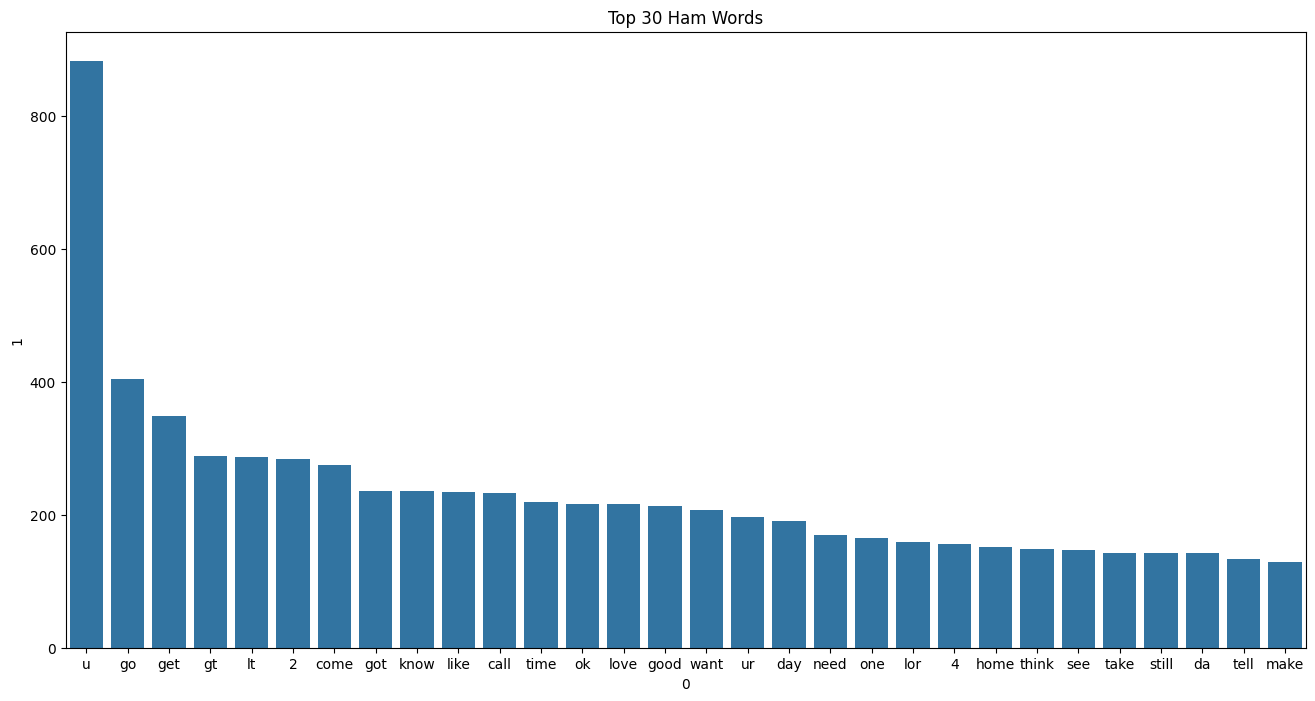

In [185]:
df_ham_words = pd.DataFrame(ham_words.most_common(30))
plt.figure(figsize=[16,8])
sns.barplot(data=df_ham_words, x=df_ham_words[0], y=df_ham_words[1])
plt.title("Top 30 Ham Words")
plt.show()

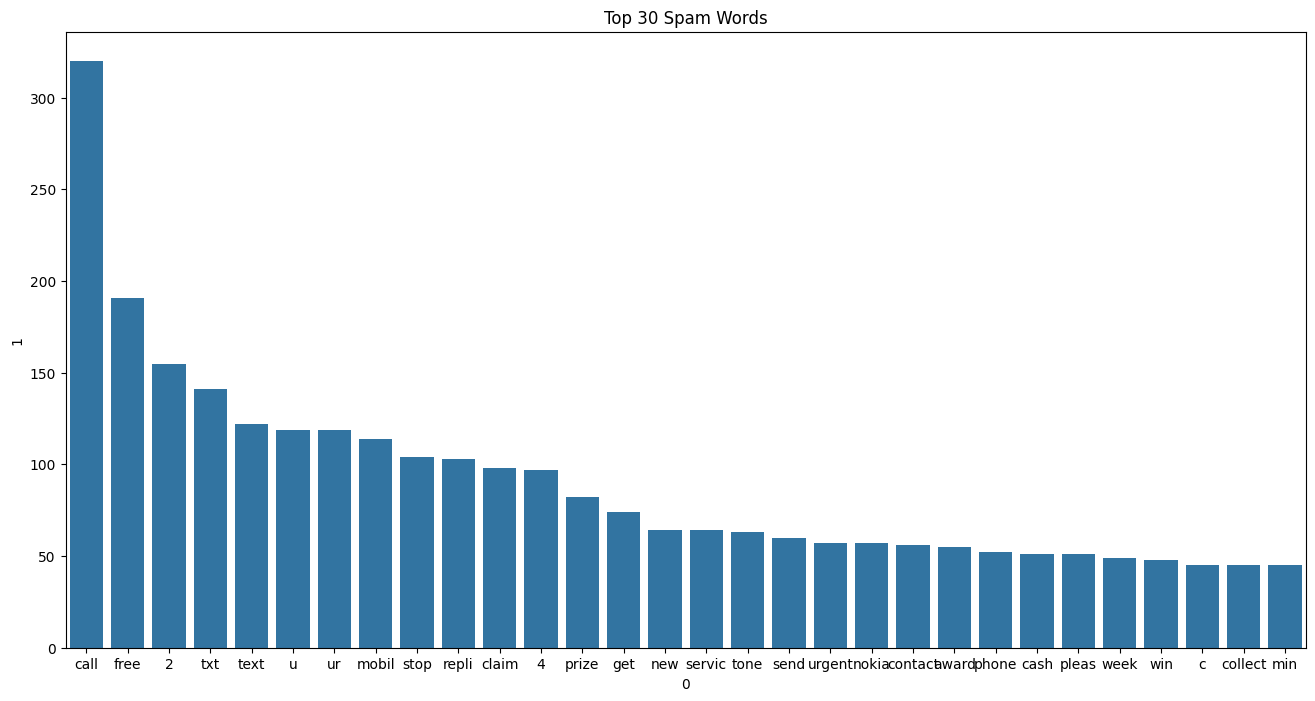

In [186]:
df_spam_words = pd.DataFrame(spam_words.most_common(30))
plt.figure(figsize=[16,8])
sns.barplot(x=df_spam_words[0], y=df_spam_words[1])
plt.title("Top 30 Spam Words")
plt.show()

In [187]:
from sklearn.feature_extraction.text import  TfidfVectorizer

In [188]:
tf_idf = TfidfVectorizer()

In [189]:
x = tf_idf.fit_transform(df_sms['transformed_text']).toarray()
x,x.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (5169, 6708))

In [190]:
y = df_sms['type'].values
y, y.shape

(array([0, 0, 1, ..., 0, 0, 0]), (5169,))

In [191]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

In [192]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [193]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [194]:
gnb.fit(x_train, y_train),bnb.fit(x_train, y_train),mnb.fit(x_train, y_train)

(GaussianNB(), BernoulliNB(), MultinomialNB())

In [195]:
gnb_predict = gnb.predict(x_test)
accuracy_score(y_test, gnb_predict), confusion_matrix(y_test, gnb_predict), precision_score(y_test, gnb_predict)

(0.8646034816247582,
 array([[783, 122],
        [ 18, 111]], dtype=int64),
 0.47639484978540775)

In [196]:
bnb_predict = bnb.predict(x_test)
accuracy_score(y_test, bnb_predict), confusion_matrix(y_test, bnb_predict), precision_score(y_test, bnb_predict)

(0.9738878143133463,
 array([[904,   1],
        [ 26, 103]], dtype=int64),
 0.9903846153846154)

In [197]:
mnb_predict = mnb.predict(x_test)
accuracy_score(y_test, mnb_predict), confusion_matrix(y_test, mnb_predict), precision_score(y_test, mnb_predict)

(0.9622823984526112,
 array([[905,   0],
        [ 39,  90]], dtype=int64),
 1.0)

In [198]:
import pickle

In [199]:
pickle.dump(tf_idf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))

In [200]:
df_sms

,type,sms,number_of_chars,number_of_words,number_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...
